<a href="https://colab.research.google.com/github/kamranhadair/Nx-codes/blob/main/co2_impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


#Optimization Model

In [ ]:
!gdown --id 1DXG8Y65R00Ya-NNxIA9SDsYsD8r_aJAz

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DXG8Y65R00Ya-NNxIA9SDsYsD8r_aJAz
To: /content/Optimization Model.xlsx
100% 11.3k/11.3k [00:00<00:00, 44.3MB/s]


#Preprocessing and cleaning

In [ ]:
# Read the Excel file into a DataFrame
df = pd.read_excel('Optimization Model.xlsx')
dataset= df.iloc[3: , 2:5]
dataset = dataset.rename(columns={'Unnamed: 2':'CO2', 'Unnamed: 3': 'Ren', 'Unnamed: 4':'DT'})
dataset=dataset.sample(frac=1,random_state=10).reset_index(drop=True)
dataset


,CO2,Ren,DT
0,0.723151,47.4,434000010.145704
1,0.632278,51.936724,284642347.423255
2,0.621556,53.122876,268570984.566694
3,0.547333,55.982205,0
4,0.587431,54.148189,231587151.327196
5,0.713485,46.76,441000012.430676
6,0.633162,50.09,223000012.184409
7,0.85245,43.3,1127000023.077885
8,0.626781,51.39,353000014.800839
9,0.505941,58.091294,0


In [ ]:
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]


In [ ]:
X.isnull().sum()


Ren    0
DT     0
dtype: int64

In [ ]:
y.isnull().sum()

0

#Models

In [ ]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
# Feature Scaling
from sklearn.preprocessing import StandardScaler


# create a list of models
models = [LinearRegression(), RandomForestRegressor(), SVR(), DecisionTreeRegressor()]

# loop through the models and fit each one to the training data
metrics = []
for model in models:
    #Feature scaling for SVR
    if str(model)== 'SVR()':
      sc = StandardScaler()
      sc_t=StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc_t.fit_transform(X_test)
    model.fit(X_train, y_train)
    # evaluate the performance of the model on the testing set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    #Reversing feature scaling to original feature values for Other models
    if str(model)== 'SVR()':
      X_train = sc.inverse_transform(X_train)
      X_test = sc_t.inverse_transform(X_test)
    # add the evaluation metrics to a list
    metrics.append((model.__class__.__name__, mse, mae, r2))

# print the evaluation metrics
for metric in metrics:
    print(metric)

# store the evaluation metrics in separate lists
model_names = [m[0] for m in metrics]
mse_scores = [m[1] for m in metrics]
mae_scores = [m[2] for m in metrics]
r2_scores = [m[3] for m in metrics]

# print the evaluation metrics
print("Model Names:", model_names)
print("MSE Scores:", mse_scores)
print("MAE Scores:", mae_scores)
print("R2 Scores:", r2_scores)

('LinearRegression', 0.0002143783485002303, 0.012707141723734484, 0.9765921917147539)
('RandomForestRegressor', 0.0003450698391838596, 0.01359495447045469, 0.9623220875748661)
('SVR', 0.002493679879374426, 0.041250393994069864, 0.7277169968444381)
('DecisionTreeRegressor', 0.000901680319315833, 0.019606691214748208, 0.9015462139867082)
Model Names: ['LinearRegression', 'RandomForestRegressor', 'SVR', 'DecisionTreeRegressor']
MSE Scores: [0.0002143783485002303, 0.0003450698391838596, 0.002493679879374426, 0.000901680319315833]
MAE Scores: [0.012707141723734484, 0.01359495447045469, 0.041250393994069864, 0.019606691214748208]
R2 Scores: [0.9765921917147539, 0.9623220875748661, 0.7277169968444381, 0.9015462139867082]


#DataFrame/Table

In [ ]:
# create an empty DataFrame
df = pd.DataFrame(columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R2_score'])

# loop through the models and append the evaluation metrics to the DataFrame
for model in models:
      #Feature scaling for SVR
    if str(model)== 'SVR()':
      sc = StandardScaler()
      sc_t=StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc_t.fit_transform(X_test)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    #Reversing feature scaling to original feature values for Other models
    if str(model)== 'SVR()':
      X_train = sc.inverse_transform(X_train)
      X_test = sc_t.inverse_transform(X_test)
    df = pd.concat([df, pd.DataFrame({
        'Model': [model.__class__.__name__],
        'Mean Squared Error': [mse],
        'Mean Absolute Error': [mae],
        'R2_score': [r2]
    })], ignore_index=True)

# display the results DataFrame
display(df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,Model,Mean Squared Error,Mean Absolute Error,R2_score
0,LinearRegression,0.000214,0.012707,0.976592
1,RandomForestRegressor,0.000345,0.013595,0.962322
2,SVR,0.002494,0.041250,0.727717
3,DecisionTreeRegressor,0.000902,0.019607,0.901546


The table summarizes the performance of different regression models. Its purpose is to compare and evaluate these models based on metrics such as mean squared error, mean absolute error, and R2 score. By analyzing these metrics, one can assess how well each model fits the data and predicts the target variable. The goal is to identify the model with the lowest errors and highest R2 score, indicating better accuracy and predictive power. The Random Forest Regressor emerged as the top-performing model in this comparison, demonstrating the lowest errors and highest R2 score among the models evaluated.

#graph

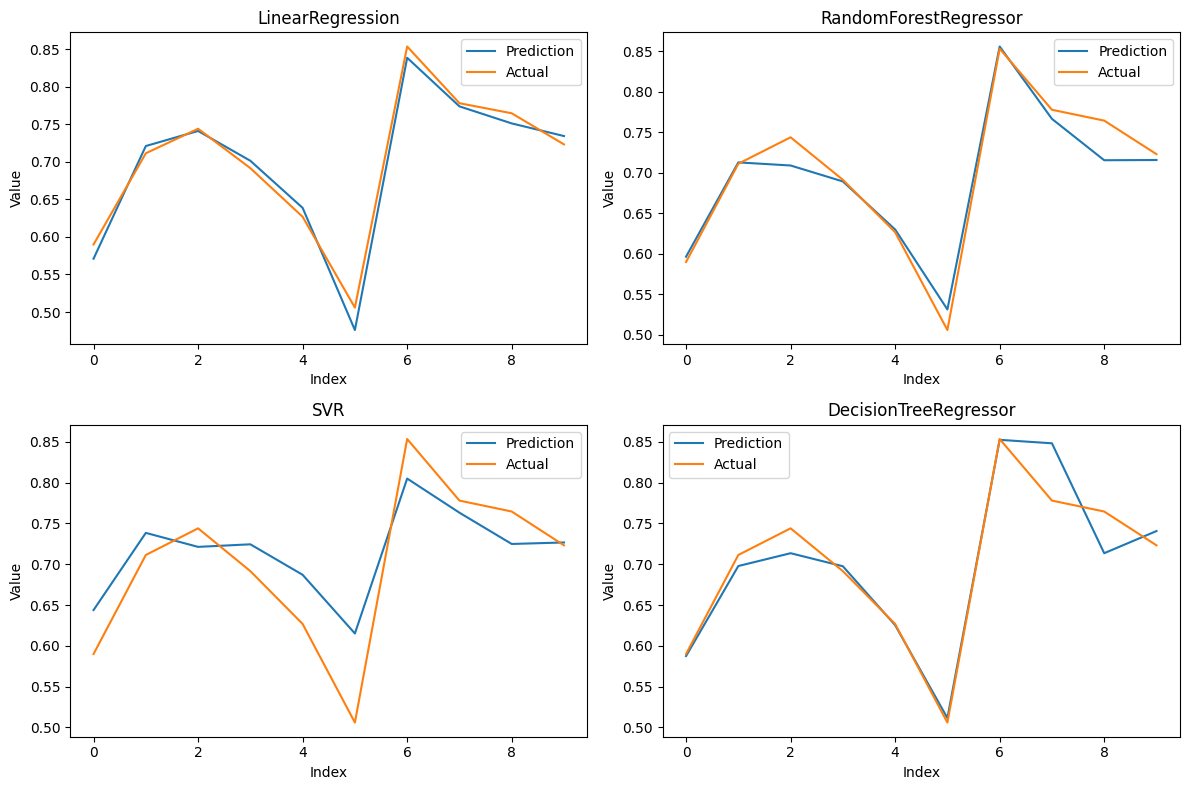

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, model in enumerate(models):
        #Feature scaling for SVR
    if str(model)== 'SVR()':
      sc = StandardScaler()
      sc_t=StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc_t.fit_transform(X_test)
    # fit the model on the training data
    model.fit(X_train, y_train)
    # make predictions on the test data
    y_pred = model.predict(X_test)
    #Reversing feature scaling to original feature values for Other models
    if str(model)== 'SVR()':
      X_train = sc.inverse_transform(X_train)
      X_test = sc_t.inverse_transform(X_test)
    # create a line plot for the predictions and y_test
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.plot(y_pred, label='Prediction')
    ax.plot(list(y_test), label='Actual')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.set_title(model.__class__.__name__)
    ax.legend()

plt.tight_layout()
plt.show()


grid of subplots using matplotlib to visually compare the predictions of different regression models against the actual values. Each subplot represents a model and displays the predicted values (labeled as 'Prediction') plotted against the actual values (labeled as 'y_test'). The x-axis represents the index of the data points, while the y-axis represents the corresponding values. The subplot labels indicate the class names of the respective models. This visualization allows for a direct comparison of how well each model captures the patterns and trends in the data, providing insights into their accuracy and performance.

#Mondthly_data

In [ ]:
!gdown --id 1uwWdagg569ifVtyga4NdIXb0AGd3YwbU

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uwWdagg569ifVtyga4NdIXb0AGd3YwbU
To: /content/MOnthly daya (2).xlsx
100% 19.6k/19.6k [00:00<00:00, 44.6MB/s]


#Preprocessing and cleaning

In [ ]:
# Read the Excel file into a DataFrame
df = pd.read_excel('/content/MOnthly daya (2).xlsx')
dataset= df.iloc[2: , 2:5]
dataset = dataset.rename(columns={'Unnamed: 2':'LnCO2', 'Unnamed: 3': 'LnDT', 'Unnamed: 4':'LnRen'})
#Shuffling rows
dataset=dataset.sample(frac=1,random_state=10).reset_index(drop=True)
# Print the DataFrame
dataset

,LnCO2,LnDT,LnRen
0,-0.269974,19.959696,3.837946
1,-0.450616,19.172097,3.932806
2,-0.602697,0,4.025034
3,-0.158466,20.979457,3.769537
4,-0.360247,21.619354,3.892312
...,...,...,...
379,-0.368889,21.263262,3.897874
380,-0.164649,20.587446,3.777119
381,-0.681335,0,4.062016
382,-0.450616,19.172097,3.932806


In [ ]:
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

In [ ]:
X.isnull().sum()

LnDT     0
LnRen    0
dtype: int64

In [ ]:
y.isnull().sum()

0

#models

In [ ]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# create a list of models
models = [LinearRegression(), RandomForestRegressor(), SVR(), DecisionTreeRegressor()]

# loop through the models and fit each one to the training data
metrics = []
for model in models:
      #Feature scaling for SVR
    if str(model)== 'SVR()':
      sc = StandardScaler()
      sc_t=StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc_t.fit_transform(X_test)
    model.fit(X_train, y_train)

    # evaluate the performance of the model on the testing set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    #Reversing feature scaling to original feature values for Other models
    if str(model)== 'SVR()':
      X_train = sc.inverse_transform(X_train)
      X_test = sc_t.inverse_transform(X_test)
    # add the evaluation metrics to a list
    metrics.append((model.__class__.__name__, mse, mae, r2))

# print the evaluation metrics
for metric in metrics:
    print(metric)

# store the evaluation metrics in separate lists
model_names = [m[0] for m in metrics]
mse_scores = [m[1] for m in metrics]
mae_scores = [m[2] for m in metrics]
r2_scores = [m[3] for m in metrics]

# print the evaluation metrics
print("Model Names:", model_names)
print("MSE Scores:", mse_scores)
print("MAE Scores:", mae_scores)
print("R2 Scores:", r2_scores)
print(y_pred, y_test)

('LinearRegression', 0.0003414748899973866, 0.014599024882951816, 0.9836862511458493)
('RandomForestRegressor', 2.6854957036472827e-09, 1.5494470778239903e-05, 0.9999998717021259)
('SVR', 0.003098407145617446, 0.04584734173298903, 0.851975540509301)
('DecisionTreeRegressor', 1.643681590468417e-33, 2.2013042729636725e-17, 1.0)
Model Names: ['LinearRegression', 'RandomForestRegressor', 'SVR', 'DecisionTreeRegressor']
MSE Scores: [0.0003414748899973866, 2.6854957036472827e-09, 0.003098407145617446, 1.643681590468417e-33]
MAE Scores: [0.014599024882951816, 1.5494470778239903e-05, 0.04584734173298903, 2.2013042729636725e-17]
R2 Scores: [0.9836862511458493, 0.9999998717021259, 0.851975540509301, 1.0]
[-0.4780933  -0.30023723 -0.68133477 -0.15964127 -0.47552886 -0.33759441
 -0.52769349 -0.34079333 -0.36024742 -0.21820606 -0.46944132 -0.26842756
 -0.53199613 -0.52769349 -0.25105379 -0.16464859 -0.45061595 -0.36024742
 -0.52769349 -0.46670371 -0.15846644 -0.29574498 -0.45061595 -0.47552886
 -0.

#DataFrame/Table

In [ ]:
# create an empty DataFrame
df = pd.DataFrame(columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R2_score'])

# loop through the models and append the evaluation metrics to the DataFrame
for model in models:
    #Feature scaling for SVR
    if str(model)== 'SVR()':
      sc = StandardScaler()
      sc_t=StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc_t.fit_transform(X_test)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
        #Reversing feature scaling to original feature values for Other models
    if str(model)== 'SVR()':
      X_train = sc.inverse_transform(X_train)
      X_test = sc_t.inverse_transform(X_test)
    df = pd.concat([df, pd.DataFrame({
        'Model': [model.__class__.__name__],
        'Mean Squared Error': [mse],
        'Mean Absolute Error': [mae],
        'R2_score': [r2]
    })], ignore_index=True)

# display the results DataFrame
display(df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,Model,Mean Squared Error,Mean Absolute Error,R2_score
0,LinearRegression,3.414749e-04,1.459902e-02,0.983686
1,RandomForestRegressor,2.685496e-09,1.549447e-05,1.000000
2,SVR,3.098407e-03,4.584734e-02,0.851976
3,DecisionTreeRegressor,1.643682e-33,2.201304e-17,1.000000


The table summarizes the performance of different regression models. Its purpose is to compare and evaluate these models based on metrics such as mean squared error, mean absolute error, and R2 score. By analyzing these metrics, one can assess how well each model fits the data and predicts the target variable. The goal is to identify the model with the lowest errors and highest R2 score, indicating better accuracy and predictive power. The Random Forest Regressor and Decision Tree Regressor emerged as the top-performing model in this comparison, demonstrating the lowest errors and highest R2 score among the models evaluated.

#Graph

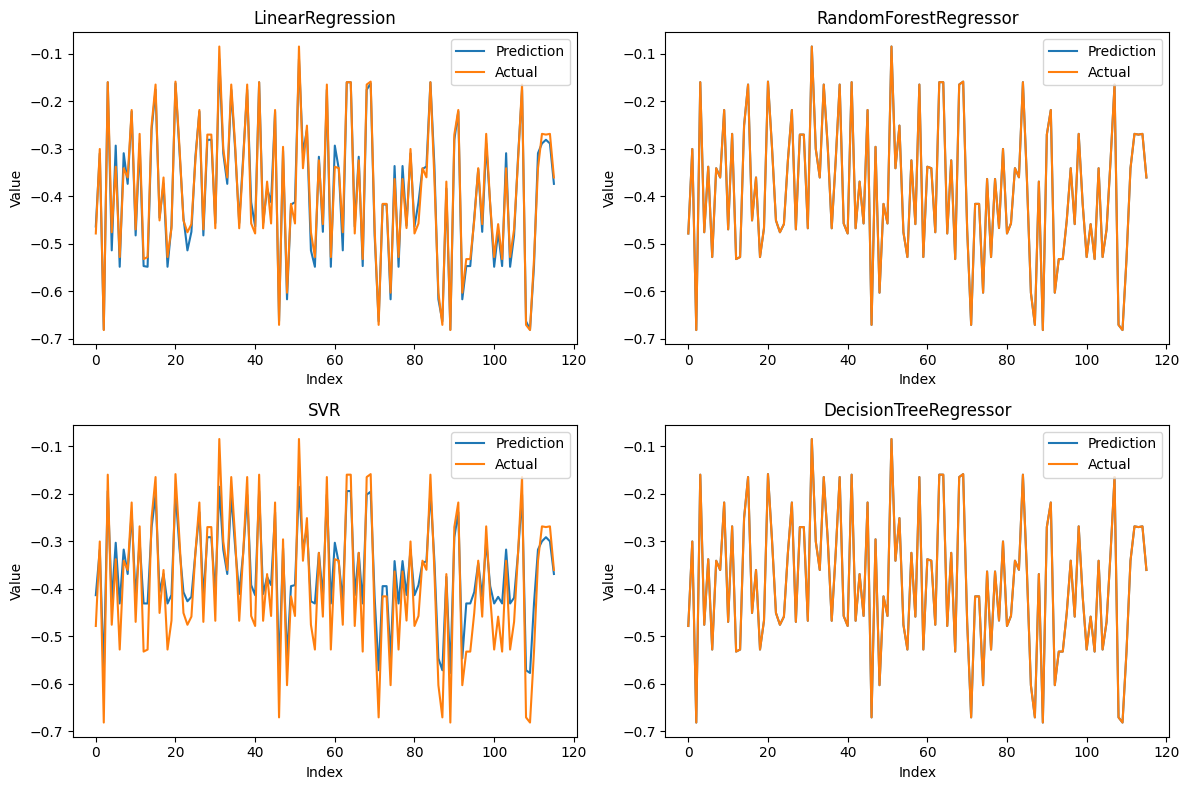

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, model in enumerate(models):
      #Feature scaling for SVR
    if str(model)== 'SVR()':
      sc = StandardScaler()
      sc_t=StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc_t.fit_transform(X_test)
    #fit the model on the training data
    model.fit(X_train, y_train)
    # make predictions on the test data
    y_pred = model.predict(X_test)
        #Reversing feature scaling to original feature values for Other models
    if str(model)== 'SVR()':
      X_train = sc.inverse_transform(X_train)
      X_test = sc_t.inverse_transform(X_test)
    #create a line plot for the predictions and y_test
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.plot(y_pred, label='Prediction')
    ax.plot(list(y_test), label='Actual')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.set_title(model.__class__.__name__)
    ax.legend()

plt.tight_layout()
plt.show()


Grid of subplots using matplotlib to visually compare the predictions of different regression models against the actual values. Each subplot represents a model and displays the predicted values (labeled as 'Prediction') plotted against the actual values (labeled as 'y_test'). The x-axis represents the index of the data points, while the y-axis represents the corresponding values. The subplot labels indicate the class names of the respective models. This visualization allows for a direct comparison of how well each model captures the patterns and trends in the data, providing insights into their accuracy and performance.